# Titanic Dataset Investigation

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

This notebook describes my analysis of a dataset containing information from 891 of the 2224 passengers and crew on board of the Titanic as I attemp to answer what factors made people more likely to survive the tragedy.

The Titanic dataset was provided by [Kaggle](https://www.kaggle.com).

## Acquiring

First, I need to import all the libraries and packages that are necessary for this notebook and create a pandas dataframe from the titanic-data.csv file.

In [50]:
# import all necessary packages and functions.
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [51]:
# file location
dataset = "titanic-data.csv"

# creating a pandas dataframe
titanic_data = pd.read_csv(dataset)

## Cleaning

Now, we have some data but after looking at some of the values carefully I noticed that some of them where missing. Moreover, not all this information is relevant for my analysis. For example, I don't really need the passenger's ID number or their ticket number.

Some of the data is just not represented well. It's better to group age together in different ranges than to have individual ages for the passengers. Lastly, I'm not going to look at the sibling or parent relationship. Instead I'm only concerned whether they have a family member on board or not.

In [52]:
# new column which represents the prescence of family aboard or not
titanic_data['Family'] = (titanic_data['SibSp'] == 1) | (titanic_data['Parch'] == 1)

age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']

# new column which makes age more easy to analyze by grouping it together
titanic_data['Age_group'] = pd.cut(titanic_data.Age, range(0, 81, 10), right=False, labels=age_labels)

# removing data that will not be used
titanic_data.drop(['PassengerId', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Age'], axis=1, inplace=True)

I'm still not satisfied by how my dataset looks. Some of the columns can have better descriptions and some of the values can be better represented using booleans.

In [53]:
# improving the value types in the 'survived' column
survived_map = {0: False, 1: True}
titanic_data['Survived'] = titanic_data['Survived'].map(survived_map)

# improving the descriptions in the 'Class' column
class_map = {1: 'Upper Class', 2: 'Middle Class', 3: 'Lower Class'}
titanic_data['Class'] = titanic_data['Pclass'].map(class_map)

# improving the descriptions in the 'Port' column
port_map = {'S': 'Southampton', 'C': 'Cherbourg','Q':'Queenstown'}
titanic_data['Port'] = titanic_data['Embarked'].map(port_map)

# removing the Embarked column
titanic_data.drop(['Embarked', 'Pclass'], axis=1, inplace=True)

# Displaying the data
titanic_data.head()

,Survived,Name,Sex,Fare,Family,Age_group,Class,Port
0,False,"Braund, Mr. Owen Harris",male,7.2500,True,20-29,Lower Class,Southampton
1,True,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,71.2833,True,30-39,Upper Class,Cherbourg
2,True,"Heikkinen, Miss. Laina",female,7.9250,False,20-29,Lower Class,Southampton
3,True,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,53.1000,True,30-39,Upper Class,Southampton
4,False,"Allen, Mr. William Henry",male,8.0500,False,30-39,Lower Class,Southampton


## Exploring

Now that the dataset is looking much better I can start exploring and learning from it. I'm looking at the factors made people more likely to survive the sinking of the Titanic. For now, let's just find the number of survivors from the 891 passengers and it's frequency.

In [54]:
# number of passengers in the dataset
number_of_passengers = len(titanic_data)

# number_of_survivors
number_of_survivors = (titanic_data['Survived']).sum()

# survival ratio
survival_ratio = number_of_survivors / number_of_passengers

print("Total number of passengers: " + str(number_of_passengers))
print("Total survivors: " + str(number_of_survivors))
print("Survival ratio: " + str(round(survival_ratio, 2)))

Total number of passengers: 891
Total survivors: 342
Survival ratio: 0.38


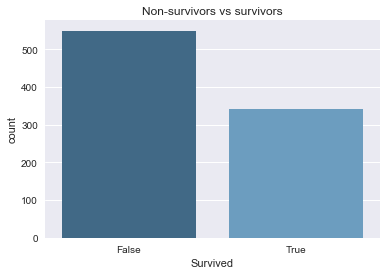

In [79]:
plot = sns.countplot(data=titanic_data, x="Survived", palette="Blues_d")
plot.set_title("Non-survivors vs survivors")
sns.plt.show()

### Gender

When the Titanic sank, the safety of women and children came first. My guess is that their is a higher ratio of women how survived than men.

In [83]:
# number of men on board of the Titanic
number_of_men = (titanic_data['Sex'] == 'male').sum()

# number of women on board of the Titanic
number_of_women = (titanic_data['Sex'] == 'female').sum()

# ratio of men abort
ratio_of_men = number_of_men / number_of_passengers

# ratio of women abort
ratio_of_women = number_of_women / number_of_passengers

print("Number of men: " + str(number_of_men))
print("Number of women: " + str(number_of_women))

Number of men: 577
Number of women: 314


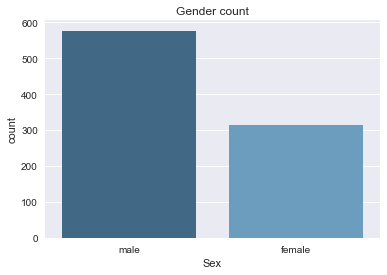

In [82]:
plot = sns.countplot(data=titanic_data, x="Sex", palette="Blues_d")
plot.set_title("Gender count")
sns.plt.show()

In [56]:
# group the data by gender and outcome
gender_vs_survival = titanic_data.groupby(['Survived', 'Sex']).size()

# number of men who survived and did not survived
men_survived = gender_vs_survival[True, 'male']
men_not_survived = gender_vs_survival[False, 'male']

# number of women who survived and did not survived
women_survived = gender_vs_survival[True, 'female']
women_not_survived = gender_vs_survival[False, 'female']

# survival percentages
survival_ratio_for_men = round(men_survived / number_of_men, 3) * 100
survival_ratio_for_women = round(women_survived / number_of_women, 3) * 100

print("Number of men who survived: " + str(men_survived))
print("Number of women who survived: " + str(women_survived) + "\n")
print("Percentage of men who survived: " + str(survival_ratio_for_men) + "%")
print("Percentage of women who survived: " + str(survival_ratio_for_women) + "%")

Number of men who survived: 109
Number of women who survived: 233

Percentage of men who survived: 18.9%
Percentage of women who survived: 74.2%


As we can see, women were much more likely to survive the tragedy than men. In fact 74% of the woman abort survived while only a mere 19% of the man did.

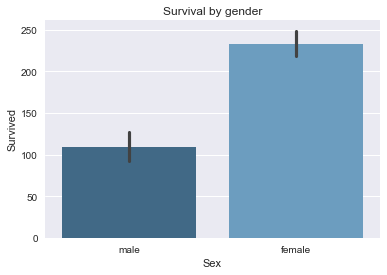

In [85]:
plot = sns.barplot(data=titanic_data, x="Sex", y="Survived", palette="Blues_d", estimator=sum)
plot.set_title("Survival by gender")
plot.set(ylabel="Survived")
sns.plt.show()

### Age group